## Optimal spatial & temporal filters

From Dong, D. W., & Atick, J. J. (1995). Temporal Decorrelation: A Theory of Lagged and Nonlagged Responses in the Lateral Geniculate Nucleus.

$$ K_{LGN}(t) = t(1-\pi w_c t)e^{-2\pi wct} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time')

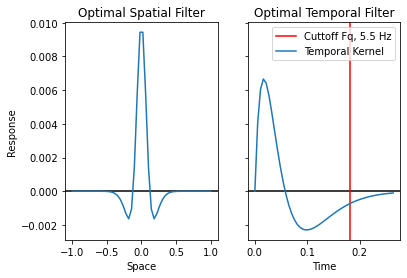

In [2]:
#temporal cuttoff frequency
wc = 5.5 #hz?

#spatial
s = np.linspace(-1,1)
sigpush = 0.05
sigpull = 0.1
kretina = 0.015*np.exp(-(s)**2/((2*sigpush)**2)) - \
          0.005*np.exp(-(s)**2/((2*sigpull)**2))      #s/((1+(s**2)/(wc**2))**(3/2))

#temporal
t = np.linspace(0,8*0.033)
klgn = t*(1-np.pi*wc*t)*np.exp(-2*np.pi*wc*t)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.axhline(0,c='black')
ax1.plot(s,kretina)
ax1.set_title('Optimal Spatial Filter')
ax1.set_xlabel('Space')
ax1.set_ylabel('Response')
ax2.axhline(0,c='black')
ax2.axvline(1/wc,c='r', label=f'Cuttoff Fq, {wc} Hz')
ax2.plot(t,klgn, label='Temporal Kernel')
ax2.legend()
ax2.set_title('Optimal Temporal Filter')
ax2.set_xlabel('Time')



/home/vasha/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/vasha/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

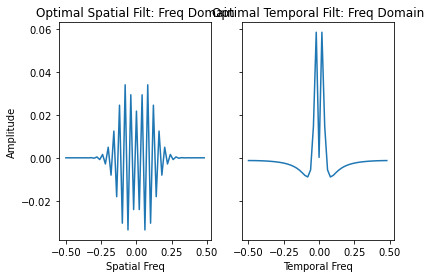

In [3]:
#spatial
s_ft = np.fft.fftshift(np.fft.fft(kretina))
s_fq = np.fft.fftshift(np.fft.fftfreq(len(kretina)))

#temporal
t_ft = np.fft.fftshift(np.fft.fft(klgn))
t_fq = np.fft.fftshift(np.fft.fftfreq(len(klgn)))

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(s_fq,s_ft)
ax1.set_title('Optimal Spatial Filt: Freq Domain')
#l = plt.axhline(0,c='black')
ax1.set_xlabel('Spatial Freq')
ax1.set_ylabel('Amplitude')
ax2.plot(t_fq,t_ft)
#ax2.axhline(0,c='black')
ax2.set_title('Optimal Temporal Filt: Freq Domain')
ax2.set_xlabel('Temporal Freq')
ax1.set_ylabel('Amplitude')
